In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import matplotlib as plt

In [13]:
os.chdir('C:\\Users\\Samantha\\Desktop\\data_mining\\Course 5\\Capstone')
data = pd.read_csv('Ops Analyst Proj NEW.csv', header = 0)

In [14]:
data.info()
%store data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8625 entries, 0 to 8624
Data columns (total 23 columns):
Group               8625 non-null object
Interval            8625 non-null object
Date                8625 non-null int64
Date(2)             8625 non-null int64
Day of Week         8625 non-null object
Month               8625 non-null object
Year                8625 non-null int64
Calls Offered       8625 non-null int64
Service Level       3354 non-null object
Answered            8625 non-null int64
ASA                 8625 non-null int64
Abandoned           8625 non-null object
ASAB                8625 non-null int64
%_Aband             8625 non-null object
Voicemail           8625 non-null int64
AHT                 8625 non-null int64
Staff Logged In     8625 non-null int64
Talk Time           8625 non-null int64
After Call Work     8625 non-null int64
Inbound             8625 non-null int64
% ANS by Primary    8625 non-null object
Occupancy           8625 non-null object
Unna

In [15]:
data.columns

Index(['Group', 'Interval', 'Date', 'Date(2)', 'Day of Week', 'Month', 'Year',
       'Calls Offered', 'Service Level', 'Answered', 'ASA', 'Abandoned',
       'ASAB', '%_Aband', 'Voicemail', 'AHT', 'Staff Logged In', 'Talk Time',
       'After Call Work', 'Inbound', '% ANS by Primary', 'Occupancy',
       'Unnamed: 22'],
      dtype='object')

In [16]:
data.head()

,Group,Interval,Date,Date(2),Day of Week,Month,Year,Calls Offered,Service Level,Answered,...,%_Aband,Voicemail,AHT,Staff Logged In,Talk Time,After Call Work,Inbound,% ANS by Primary,Occupancy,Unnamed: 22
0,Spanish,12:00:00 AM,20190101,1,Tue,Jan,2019,1,0%,0,...,100%,0,0,0,0,0,0,0%,0%,NaN
1,Spanish,12:15:00 AM,20190101,1,Tue,Jan,2019,0,NaN,0,...,0%,0,0,0,0,0,0,0%,0%,NaN
2,Spanish,12:30:00 AM,20190101,1,Tue,Jan,2019,0,NaN,0,...,0%,0,0,0,0,0,0,0%,0%,NaN
3,Spanish,12:45:00 AM,20190101,1,Tue,Jan,2019,0,NaN,0,...,0%,0,0,0,0,0,0,0%,0%,NaN
4,Spanish,1:00:00 AM,20190101,1,Tue,Jan,2019,0,NaN,0,...,0%,0,0,0,0,0,0,0%,0%,NaN


In [18]:
pd.isnull(data)
#seemingly significant portion of service level oberservations are nan
#What I want to do is change nan to 0, because I still want to be able to track the calls that come
#in oustide of available SSS times for insight, rather than dismissing all observations outside of SSS business hrs
#a) I want to see whether the calls that fall oustide of business hours show a trend, whether they're significant (especially)
#the obs after 7 pm (SSS end of day)
#b)is this only variable with nan? need to check
#via describe funtcion:
#Service Level       3354 non-null object of 8625 = 5,271 obs that are null; a majority (61%)
#%_Aband             8624 non-null object; 1 obsv nan
data1 = data.copy()

In [19]:
data1 = data1.fillna(0)

In [20]:
#data1["%_Aband"] = data1["%_Aband"].astype("int")
#df['product_type'] = df['product_type'].str.strip('product_type ')
data1['%_Aband'] = data1['%_Aband'].str.strip('%_Aband')
#credit1_copy["MAR"] = credit1_copy["MAR"].astype("int")

In [21]:
data1.info()
#still one obs as nan in %_Aband
data1.std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8625 entries, 0 to 8624
Data columns (total 23 columns):
Group               8625 non-null object
Interval            8625 non-null object
Date                8625 non-null int64
Date(2)             8625 non-null int64
Day of Week         8625 non-null object
Month               8625 non-null object
Year                8625 non-null int64
Calls Offered       8625 non-null int64
Service Level       8625 non-null object
Answered            8625 non-null int64
ASA                 8625 non-null int64
Abandoned           8625 non-null object
ASAB                8625 non-null int64
%_Aband             8625 non-null object
Voicemail           8625 non-null int64
AHT                 8625 non-null int64
Staff Logged In     8625 non-null int64
Talk Time           8625 non-null int64
After Call Work     8625 non-null int64
Inbound             8625 non-null int64
% ANS by Primary    8625 non-null object
Occupancy           8625 non-null object
Unna

Date                 83.479777
Date(2)               8.711421
Year                  0.000000
Calls Offered         2.595981
Answered              1.914882
ASA                 613.922734
ASAB                463.118396
Voicemail             0.010768
AHT                1551.795654
Staff Logged In    2323.724862
Talk Time           883.491602
After Call Work     643.487190
Inbound               1.893314
Unnamed: 22           0.000000
dtype: float64

In [22]:
plt.hist(data1['%_Aband'])
plt.hist(data1['Calls Offered'])


AttributeError: module 'matplotlib' has no attribute 'hist'

In [23]:
data1.columns

Index(['Group', 'Interval', 'Date', 'Date(2)', 'Day of Week', 'Month', 'Year',
       'Calls Offered', 'Service Level', 'Answered', 'ASA', 'Abandoned',
       'ASAB', '%_Aband', 'Voicemail', 'AHT', 'Staff Logged In', 'Talk Time',
       'After Call Work', 'Inbound', '% ANS by Primary', 'Occupancy',
       'Unnamed: 22'],
      dtype='object')

In [28]:
#first remove insignificant rows - year, vm
#data1 = data1.drop(['Year', 'Date', 'Voicemail', 'Unnamed: 22', 'Group'], axis = 1)
data1 = data1.drop(['Unnamed: 22'], axis = 1)

In [29]:
data1.columns

Index(['Interval', 'Date(2)', 'Day of Week', 'Month', 'Calls Offered',
       'Service Level', 'Answered', 'ASA', 'Abandoned', 'ASAB', '%_Aband',
       'AHT', 'Staff Logged In', 'Talk Time', 'After Call Work', 'Inbound',
       '% ANS by Primary', 'Occupancy'],
      dtype='object')

In [30]:
%store data1

Stored 'data1' (DataFrame)


In [31]:
data1.rename(columns = {'Date(2)':'Date'})

,Interval,Date,Day of Week,Month,Calls Offered,Service Level,Answered,ASA,Abandoned,ASAB,%_Aband,AHT,Staff Logged In,Talk Time,After Call Work,Inbound,% ANS by Primary,Occupancy
0,12:00:00 AM,1,Tue,Jan,1,0%,0,0,100%,165,100,0,0,0,0,0,0%,0%
1,12:15:00 AM,1,Tue,Jan,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
2,12:30:00 AM,1,Tue,Jan,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
3,12:45:00 AM,1,Tue,Jan,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
4,1:00:00 AM,1,Tue,Jan,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,10:45:00 PM,31,Sun,Mar,1,100%,1,4,0%,0,0,0,0,0,0,0,0%,0%
8621,11:00:00 PM,31,Sun,Mar,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
8622,11:15:00 PM,31,Sun,Mar,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%
8623,11:30:00 PM,31,Sun,Mar,0,0,0,0,0%,0,0,0,0,0,0,0,0%,0%


In [33]:
data1.groupby('Calls Offered')['Calls Offered'].count()

Calls Offered
0     5273
1      932
2      580
3      530
4      454
5      279
6      217
7      127
8       88
9       56
10      32
11      15
12      12
13      12
14       5
15       1
18       3
19       1
21       1
22       1
25       1
42       1
46       1
50       1
55       1
70       1
Name: Calls Offered, dtype: int64

In [35]:
data1.groupby('Service Level')['Service Level'].count()

Service Level
0       5271
0%       656
10%        1
100%    1764
11%        3
117%       1
120%       3
125%       5
13%        8
133%       5
14%        9
15%        2
150%      17
16%        1
167%       1
17%       13
18%        2
2%         1
20%       26
200%      10
22%        5
25%       33
27%        1
28%        1
29%        9
30%        2
33%       63
36%        3
37%        1
38%        4
40%       33
42%        1
43%       15
44%        3
46%        1
5%         1
50%      179
55%        1
56%        8
57%       15
58%        1
60%       29
63%        6
67%      161
69%        1
7%         1
70%        2
71%       13
75%       97
78%        4
8%         2
80%       55
83%       40
86%       16
88%       11
89%        2
90%        3
91%        2
92%        1
Name: Service Level, dtype: int64

In [44]:
data1.groupby('Day of Week')['Abandoned'].count()

Day of Week
Fri    1238
Mon    1152
Sat    1247
Sun    1244
Thu    1248
Tue    1248
Wed    1248
Name: Abandoned, dtype: int64

In [45]:
data1.groupby('Abandoned')['Day of Week'].count()

Abandoned
0%        7756
10%         10
100%       173
11%         15
113%         2
118%         1
119%         1
125%         1
13%         23
133%         1
14%         38
15%          4
150%         6
160%         1
167%         1
17%         41
172%         1
18%          2
20%         56
200%        11
22%          8
25%         81
27%          2
29%         15
30%          3
300%         1
31%          2
33%        118
350%         1
36%          2
38%          8
39%          1
40%         23
43%          6
44%          6
45%          1
49300%       1
5%           1
50%        118
54%          1
57%          3
60%         15
61%          1
63%          2
64%          1
67%         24
71%          1
73%          1
75%         12
77%          2
78%          2
8%           6
80%          5
82%          1
83%          1
86%          1
9%           3
91%          1
Name: Day of Week, dtype: int64

In [48]:
data1.groupby(['Calls Offered', 'Interval'])['Calls Offered'].count()

Calls Offered  Interval   
0              10:00:00 AM    27
               10:00:00 PM    84
               10:15:00 AM    26
               10:15:00 PM    83
               10:30:00 AM    23
                              ..
42             5:15:00 PM      1
46             5:15:00 PM      1
50             11:30:00 AM     1
55             11:45:00 AM     1
70             11:45:00 AM     1
Name: Calls Offered, Length: 647, dtype: int64

In [49]:
data1.groupby(['Calls Offered', 'Day of Week'])['Calls Offered'].count()

Calls Offered  Day of Week
0              Fri             622
               Mon             533
               Sat            1119
               Sun            1143
               Thu             614
                              ... 
42             Wed               1
46             Wed               1
50             Mon               1
55             Wed               1
70             Mon               1
Name: Calls Offered, Length: 94, dtype: int64

In [50]:
data1.groupby(['Calls Offered', 'Month'])['Calls Offered'].count()

Calls Offered  Month
0              Feb      1621
               Jan      1766
               Mar      1886
1              Feb       252
               Jan       356
               Mar       324
2              Feb       149
               Jan       206
               Mar       225
3              Feb       173
               Jan       176
               Mar       181
4              Feb       140
               Jan       177
               Mar       137
5              Feb        76
               Jan       117
               Mar        86
6              Feb        85
               Jan        76
               Mar        56
7              Feb        51
               Jan        37
               Mar        39
8              Feb        49
               Jan        22
               Mar        17
9              Feb        26
               Jan        19
               Mar        11
10             Feb        20
               Jan        10
               Mar         2
11             Feb    

In [53]:
DOW_graph = data1.groupby(['Day of Week', 'Calls Offered'])['Calls Offered'].count()

C:\Users\Samantha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


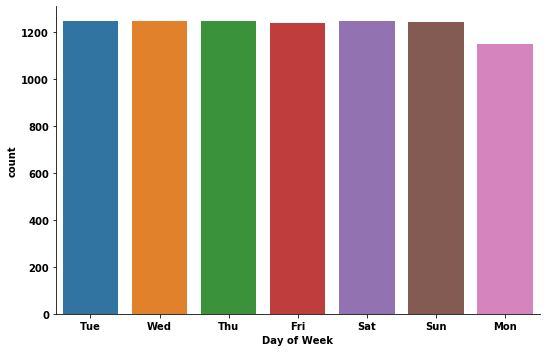

In [54]:
sns.factorplot('Day of Week', data = data1, kind='count', aspect=1.5)

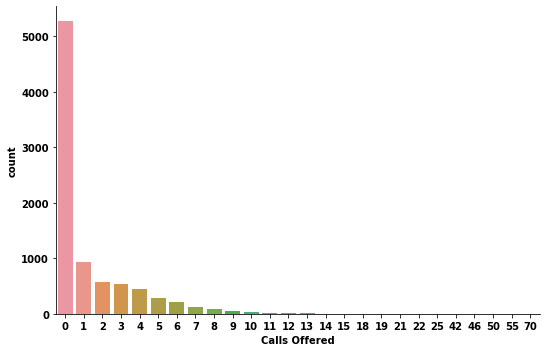

In [55]:
sns.factorplot('Calls Offered', data = data1, kind='count', aspect=1.5)

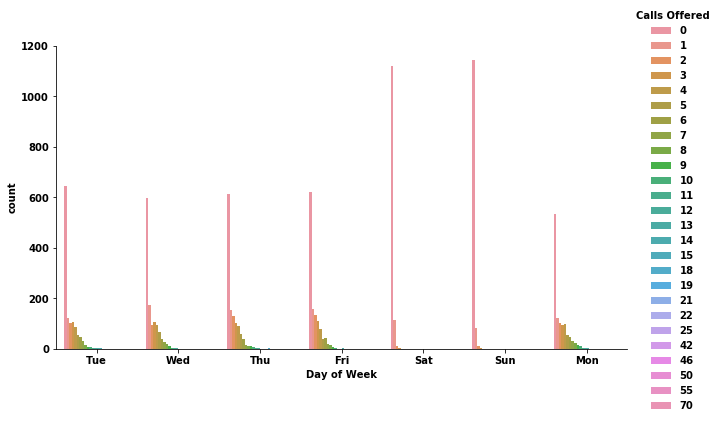

In [57]:
DOW = sns.factorplot('Day of Week', data = data1, hue = 'Calls Offered', kind='count', aspect=1.75)

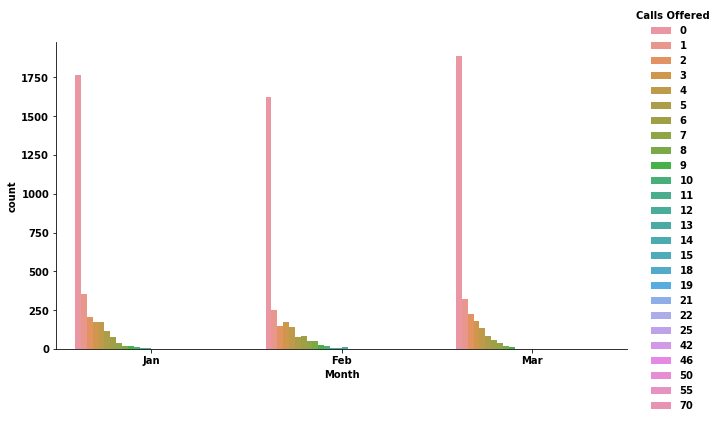

In [58]:
sns.factorplot('Month', data = data1, hue = 'Calls Offered', kind='count', aspect=1.75)

In [59]:
data1.pivot_table('Calls Offered', 'Day of Week', 'Month', aggfunc=np.sum, margins=True)

Month,Feb,Jan,Mar,All
Day of Week,,,,
Fri,665,655,638,1958
Mon,1019,785,735,2539
Sat,51,49,48,148
Sun,30,53,41,124
Thu,756,815,566,2137
Tue,950,687,618,2255
Wed,977,859,569,2405
All,4448,3903,3215,11566


In [63]:
data1.pivot_table('Abandoned', 'Day of Week', 'Month', aggfunc=np.sum, margins=True)

Month,Feb,Jan,Mar,All
Day of Week,,,,
Fri,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%100%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%33%0%0%0%0%0%0%0%0%0%0%0%0%33%0%...,0%0%0%0%0%0%0%0%0%0%0%0%100%0%0%0%0%0%0%0%0%0%...
Mon,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%100%0%0%0%0%0%0%0%100%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%100%0%0%0%0%0%0%0%100%0%0%0%0%0%0%...
Sat,0%0%0%0%0%0%0%100%0%0%0%0%0%0%0%0%100%0%0%0%0%...,0%0%0%0%0%100%0%0%100%0%0%100%0%0%0%0%0%100%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%100%0%0%100%0%0%100%0%0%0%0%0%100%0%...
Sun,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...
Thu,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%100%0%100%0%0%100%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%100%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%100%0%100%0%0%100%0%0%0%0%0%0%0%0%0%0%0%0%...
Tue,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%50%0%0...,100%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,100%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...
Wed,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%33%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0...,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...
All,0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,100%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...,0%0%0%0%0%0%0%33%0%0%0%0%0%0%0%0%0%0%0%0%33%0%...,100%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%0%...


In [ ]:
#create 2 df's: one for service hours, the other for non-service hours
Serv_Hrs = data['Day of Week', 'Interval', 'Date', 'Month',  |]
#demo_vars = credit1[['AGE', 'MARRIAGE', 'EDUCATION', 'SEX', 'DEFAULT']]